## Importing Important Libraries

In [7]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Data Preprocessing

### Train Image Processing using Keras

In [8]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing using Keras

In [9]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


## Building the Model

In [10]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

### Build the convolutionallayer

In [12]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [14]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [15]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [16]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))

In [17]:
model.add(Dropout(0.25)) ## prevent overfitting

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(units=1500, activation='relu')) #add hidden layer and if we require we can add even more layers with units of 128 etc

In [20]:
model.add(Dropout(0.25)) ## prevent overfitting

In [21]:
## Output Layer
model.add(Dense(units=38, activation='softmax'))


### Compiling Model


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Training Model

In [25]:
training_history = model.fit(x=training_set, validation_data = validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1793s 815ms/step - accuracy: 0.3948 - loss: 2.1411 - val_accuracy: 0.8125 - val_loss: 0.5885
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1725s 785ms/step - accuracy: 0.8368 - loss: 0.5111 - val_accuracy: 0.9134 - val_loss: 0.2668
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1780s 810ms/step - accuracy: 0.9082 - loss: 0.2872 - val_accuracy: 0.9321 - val_loss: 0.2089
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1720s 783ms/step - accuracy: 0.9377 - loss: 0.1851 - val_accuracy: 0.9461 - val_loss: 0.1701
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1699s 773ms/step - accuracy: 0.9527 - loss: 0.1438 - val_accuracy: 0.9523 - val_loss: 0.1528
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1707s 777ms/step - accuracy: 0.9653 - loss: 0.1066 - val_accuracy: 0.9594 - val_loss: 0.1308
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1738s 791ms/step - accuracy: 0.9712 - loss: 0.0861 - val_accuracy: 0.9466 - val_loss: 0.1817
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1727s 786ms/s

## Model Evaluation on different parameters


In [26]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 727s 331ms/step - accuracy: 0.9835 - loss: 0.0494


In [27]:
print(train_loss,train_acc)

0.0453740619122982 0.9850202798843384


In [28]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 203s 368ms/step - accuracy: 0.9543 - loss: 0.1503


In [29]:
print(val_loss,val_acc)

0.15854106843471527 0.9541884660720825


## Save the Model for further Use

In [30]:
model.save("trained_model.h5")#it uses very high storage

In [31]:
model.save("trained_model.keras")#it uses very low storage

In [32]:
training_history.history

{'accuracy': [0.59807950258255,
  0.8592076301574707,
  0.9158546328544617,
  0.9422576427459717,
  0.9551319479942322,
  0.9659150838851929,
  0.9719040989875793,
  0.975986897945404,
  0.9789743423461914,
  0.981961727142334],
 'loss': [1.3565566539764404,
  0.4381898045539856,
  0.258224219083786,
  0.17234772443771362,
  0.13465677201747894,
  0.10495685040950775,
  0.08415021747350693,
  0.07239481061697006,
  0.06317979842424393,
  0.055422279983758926],
 'val_accuracy': [0.8124857544898987,
  0.9134418368339539,
  0.9321079254150391,
  0.9461074471473694,
  0.9522535800933838,
  0.9594240784645081,
  0.9465627074241638,
  0.9324493408203125,
  0.9614728093147278,
  0.9541884660720825],
 'val_loss': [0.5884608626365662,
  0.2667677402496338,
  0.20891207456588745,
  0.17007675766944885,
  0.1528177708387375,
  0.13077309727668762,
  0.1816885769367218,
  0.22500519454479218,
  0.13169197738170624,
  0.15854105353355408]}

### Record History for futher Usage in form of JSON

In [33]:
import json
with open("training_hist.json", "w") as f:
  json.dump(training_history.history,f)

## Accuracy Visualization

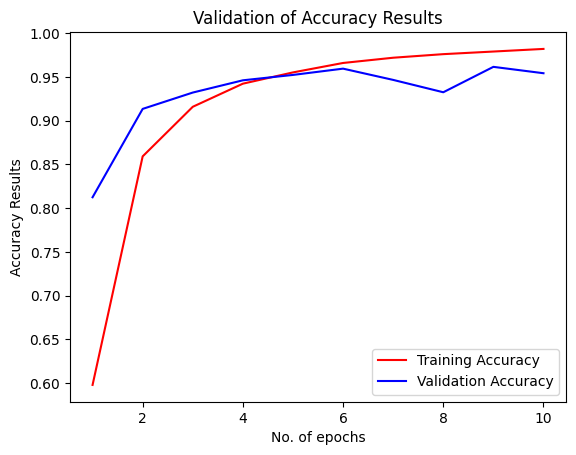

In [34]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Results")
plt.title("Validation of Accuracy Results")
plt.legend()
plt.show()

## Some Other Metrics for Model Evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 202s 367ms/step


(array([[9.9930251e-01, 5.6992588e-04, 1.8406924e-08, ..., 8.3832732e-11,
         1.0982344e-09, 2.8023495e-09],
        [9.9991703e-01, 8.0296253e-05, 4.0487076e-09, ..., 3.6020762e-15,
         2.2968307e-12, 9.7376348e-15],
        [9.9921572e-01, 5.0500338e-04, 2.7610596e-08, ..., 4.0182351e-13,
         4.9503837e-09, 6.0344890e-10],
        ...,
        [1.0338461e-09, 5.7758079e-13, 4.7515417e-08, ..., 1.7219409e-09,
         2.1012593e-10, 9.9997675e-01],
        [4.7250412e-09, 3.7675450e-11, 3.7198593e-08, ..., 9.0755762e-08,
         5.8649290e-09, 9.9997485e-01],
        [6.0622449e-19, 1.0626975e-22, 1.7421840e-19, ..., 2.1832303e-19,
         5.8190111e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [45]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [43]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.87      0.92       504
                                 Apple___Black_rot       0.91      0.99      0.95       497
                          Apple___Cedar_apple_rust       0.99      0.92      0.95       440
                                   Apple___healthy       0.98      0.93      0.96       502
                               Blueberry___healthy       0.98      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.96      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.82      0.89       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.99      0.

## Confusion Matrix Visualization


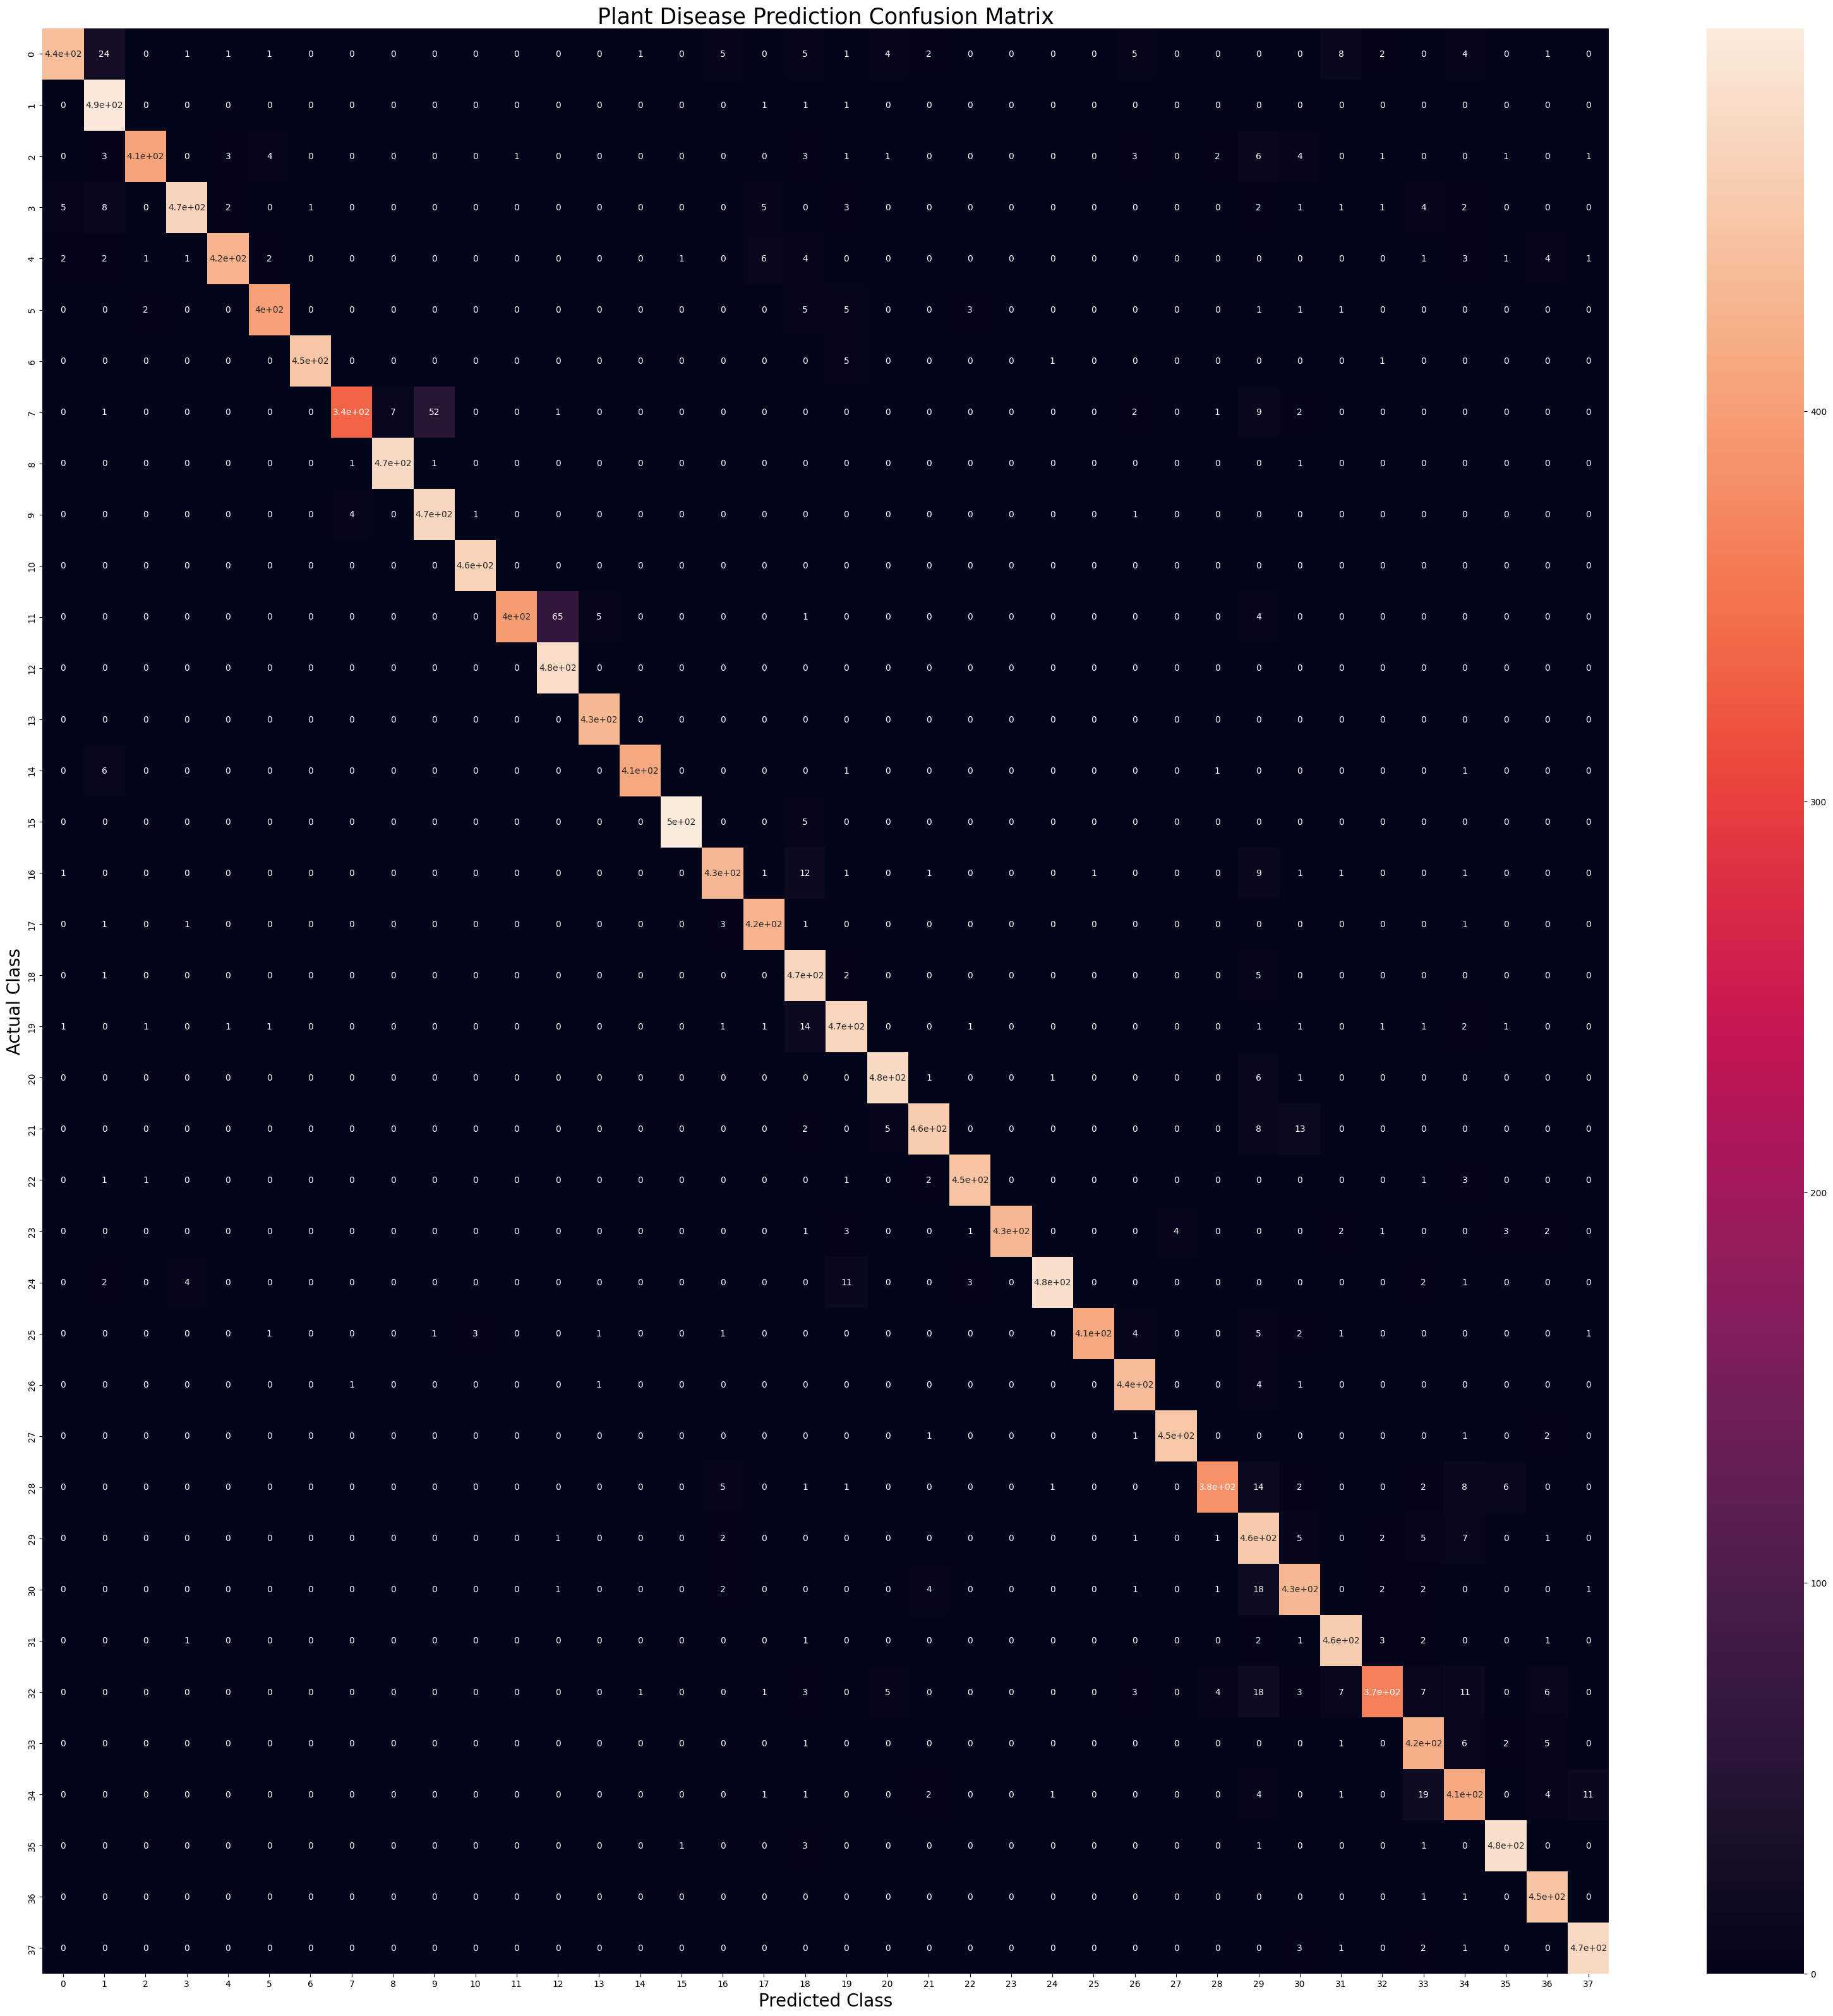

In [44]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()